<div style="text-align:center">
  <h1>Spatial Economics</h1>
  <h1>Assignment 1 Group 2</h1>
  <h3>727178</h3>
  <h3>703308</h3>
  <h3>TI</h3>
</div>

<div style="text-align:center">
  <h4>Introduction</h4>
</div>

The aim of this assignment is that you (i) familiarize yourself with the simulation approach to the Core-Periphery model and (ii) get insight in the forces that determine agglomeration and in
the outcomes of the model. It complements parts of chapter 4 of the textbook The New Introduction to Geographical Economics by Brakman et al. (and chapter 7 of the third edition
of the book with the title An Introduction to Geographical and Urban Economics: A Spiky World)

This file gives explanations to the results additional to the code for replicability. The results of this code are worked out in the pdf file.

In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

<div style="text-align:center">
  <h4>Exercise 1</h4>
</div>
Solve the model for the parametrization of the model that is assigned to your group. Describe
the equilibrium or equilibria graphically as well as in words, paying explicit attention to the
stability of the equilibria. Consider the effect of varying transport costs by constructing and
describing a graph similar to Figure 4.2 in the book (the so-called wiggle diagram). Describe
the comparative statics characteristics of the model with respect to transport costs in your own
words. Make sure that you vary the transport costs in such a way that all interesting type of
equilibria are found and can be described. 

In [2]:
def solve_system(phi1,gam,rho,bet,delta,alp,eps,L,lam,T):
    def equations(p):
            Y1, Y2, W1, W2, I1, I2 = p
            return(Y1-phi1*(1-gam)*L-lam*gam*L*W1,
                Y2-(1-phi1)*(1-gam)*L-(1-lam)*gam*L*W2,
                W1-rho*bet**(-rho)*(delta/(alp*(eps-1)))**(1/eps)*(Y1*I1**(eps-1)+T**(1-eps)*Y2*I2**(eps-1))**(1/eps),
                W2-rho*bet**(-rho)*(delta/(alp*(eps-1)))**(1/eps)*(T**(1-eps)*Y1*I1**(eps-1)+Y2*I2**(eps-1))**(1/eps),
                I1-(gam*L/(alp*eps))**(1/(1-eps))*(bet/rho)*(lam*W1**(1-eps)+(1-lam)*T**(1-eps)*W2**(1-eps))**(1/(1-eps)),
                I2-(gam*L/(alp*eps))**(1/(1-eps))*(bet/rho)*(lam*T**(1-eps)*W1**(1-eps)+(1-lam)*W2**(1-eps))**(1/(1-eps)))

    Y1, Y2, W1, W2, I1, I2 = fsolve(equations, (1, 1, 1, 1, 1, 1),xtol=1e-10)
    Rel = (W1/I1**delta)/(W2/I2**delta)
    Welf = Y1/(I1**delta)+Y2/(I2**delta)
    Man_H=W1/I1**delta
    Man_F=W2/I2**delta
    Farm_H=1/I1**delta
    Farm_F=1/I2**delta
    return Rel, Welf, Man_H, Man_F, Farm_H, Farm_F

def run_CP_model(lam_values,phi1,gam,rho,bet,delta,alp,eps,L, T):
    #print ("T is equal to", T)
    VRelative = np.zeros(len(lam_values))
    VWelfare = np.zeros(len(lam_values))
    VW_Man_H = np.zeros(len(lam_values))
    VW_Man_F = np.zeros(len(lam_values))
    VW_Farm_H = np.zeros(len(lam_values))
    VW_FRamF = np.zeros(len(lam_values))

    for lamh in range (len(lam_values)):
        #given specific lambda value the values are calculated and stored
        VRelative[lamh], VWelfare[lamh], VW_Man_H[lamh], VW_Man_F[lamh], VW_Farm_H[lamh], VW_FRamF[lamh] = solve_system(phi1,gam,rho,bet,delta,alp,eps,L,lam_values[lamh],T)

    return VWelfare, VRelative, VW_Man_H, VW_Man_F, VW_Farm_H, VW_FRamF

def run_varying_specific_parameter(varying_values,lam_values,alp,bet,gam,delta,eps,rho,phi1,L,T, type_vary):
    # for a given parameter to vary, run model and store results, ex for ex 1 varying_values = Th_values
    fig = plt.figure()
    n_T = len(varying_values)
    n_lambda = len(lam_values)

    Relative_matrix = np.zeros((n_T, n_lambda))
    Welfare_matrix = np.zeros((n_T, n_lambda))
    W_Man_H_matrix = np.zeros((n_T, n_lambda))
    W_Man_F_matrix = np.zeros((n_T, n_lambda))
    W_Farm_H_matrix = np.zeros((n_T, n_lambda))
    W_Farm_F_matrix = np.zeros((n_T, n_lambda))

    for i in range (len(varying_values)):
        if type_vary == 1: # Th
            Welfare_matrix[i, :], Relative_matrix[i, :], W_Man_H_matrix[i, :], W_Man_F_matrix[i, :], W_Farm_H_matrix[i, :], W_Farm_F_matrix[i, :] = run_CP_model(lam_values,phi1,gam,rho,bet,delta,alp,eps,L,varying_values[i])
        if type_vary == 2: # phi
            Welfare_matrix[i, :], Relative_matrix[i, :], W_Man_H_matrix[i, :], W_Man_F_matrix[i, :], W_Farm_H_matrix[i, :], W_Farm_F_matrix[i, :] = run_CP_model(lam_values,varying_values[i],gam,rho,bet,delta,alp,eps,L,T)
        if type_vary == 3: # eps
            Welfare_matrix[i, :], Relative_matrix[i, :], W_Man_H_matrix[i, :], W_Man_F_matrix[i, :], W_Farm_H_matrix[i, :], W_Farm_F_matrix[i, :] = run_CP_model(lam_values,phi1,gam,rho,bet,delta,alp,varying_values[i],L,T)
        if type_vary == 4: # eps
            Welfare_matrix[i, :], Relative_matrix[i, :], W_Man_H_matrix[i, :], W_Man_F_matrix[i, :], W_Farm_H_matrix[i, :], W_Farm_F_matrix[i, :] = run_CP_model(lam_values,phi1,varying_values[i],rho,bet,delta,alp,eps,L,T)
    return Relative_matrix, Welfare_matrix, W_Man_H_matrix, W_Man_F_matrix, W_Farm_H_matrix, W_Farm_F_matrix
    

In [3]:
def plot_selected(lam_values, all_values_selected, matrix, selected_indices, name_yaxis, name_selected, name_matrix):
    plt.figure(figsize=(8, 6))
    
    colors = ['black', 'blue', 'red', 'green', 'orange']
    linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]
    
    for plot_idx, idx in enumerate(selected_indices):
        plt.plot(lam_values, matrix[idx, :],
                 label=f'%s = {all_values_selected[idx]}'%name_selected,
                 color=colors[plot_idx],
                 linestyle=linestyles[plot_idx])
    if name_selected == 'T':
        plt.axhline(1, color='grey', linestyle='--', linewidth=0.8)
    plt.xlabel('λ (lambda)')
    plt.ylabel(name_yaxis)
    plt.title('Wiggle Diagram (Selected %s Values) for %s'%(name_selected,name_matrix))
    plt.legend(title='Plot for Different %s Values'%name_selected)
    plt.grid(True, linestyle=':', linewidth=0.5)
    plt.tight_layout()
    plt.show()

def plot_selected_subplot(ax, lam_values, all_values_selected, matrix, selected_indices, name_yaxis, name_selected, name_matrix, add_hline=False):
    colors = ['black', 'blue', 'red', 'green', 'orange']
    linestyles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]
    
    for plot_idx, idx in enumerate(selected_indices):
        ax.plot(lam_values, matrix[idx, :],
                label=f'{name_selected} = {all_values_selected[idx]:.2f}',
                color=colors[plot_idx % len(colors)],
                linestyle=linestyles[plot_idx % len(linestyles)])

    if add_hline:
        ax.axhline(1, color='grey', linestyle='--', linewidth=0.8)
    
    ax.set_xlabel('λ (lambda)')
    ax.set_ylabel(name_yaxis)
    ax.set_title(f'{name_matrix} vs λ (for selected {name_selected} values)')
    ax.legend(fontsize='small')
    ax.grid(True, linestyle=':', linewidth=0.5)

def plot_4_matrix_values(lam_values, all_values_selected, selected_indices, Relative_matrix, Welfare_matrix, W_Man_H_matrix, W_Man_F_matrix, name_selected):
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))
    axs = axs.flatten()
    plot_selected_subplot(axs[0], lam_values, all_values_selected, Relative_matrix, selected_indices, 'Relative Real Wage', name_selected, 'Relative Wage', add_hline=True)
    plot_selected_subplot(axs[1], lam_values, all_values_selected, Welfare_matrix, selected_indices, 'Welfare Index', name_selected, 'Welfare', add_hline=False)
    plot_selected_subplot(axs[2], lam_values, all_values_selected, W_Man_H_matrix, selected_indices, 'Home Manuf. Wage', name_selected, 'Home Manufacturing Wage', add_hline=False)
    plot_selected_subplot(axs[3], lam_values, all_values_selected, W_Man_F_matrix, selected_indices, 'Foreign Manuf. Wage', name_selected, 'Foreign Manufacturing Wage', add_hline=False)
    plt.tight_layout()
    plt.show()

<Figure size 640x480 with 0 Axes>

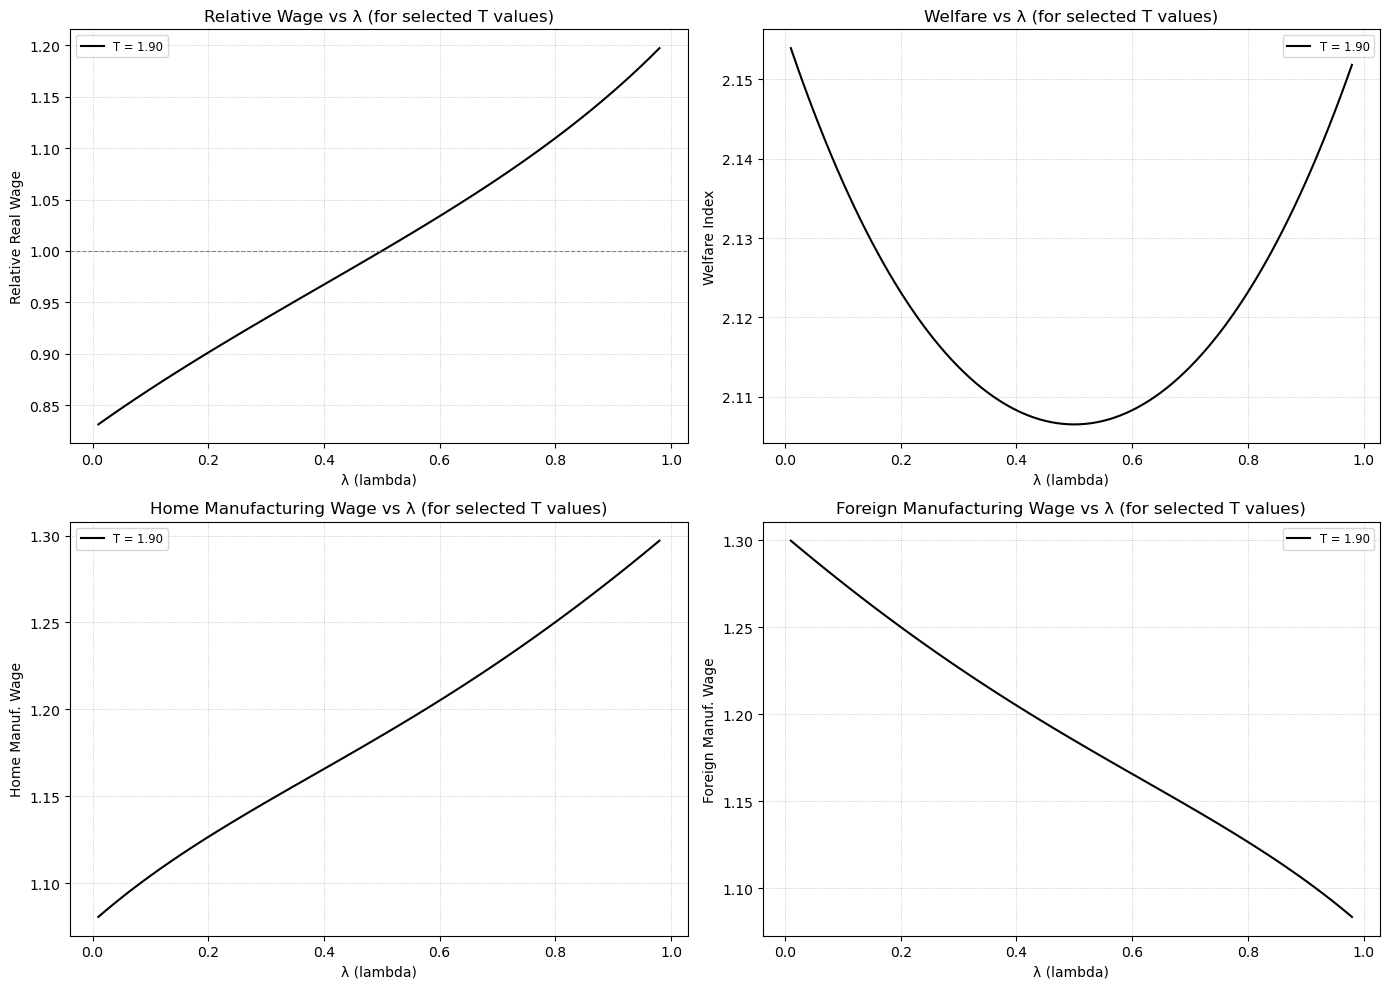

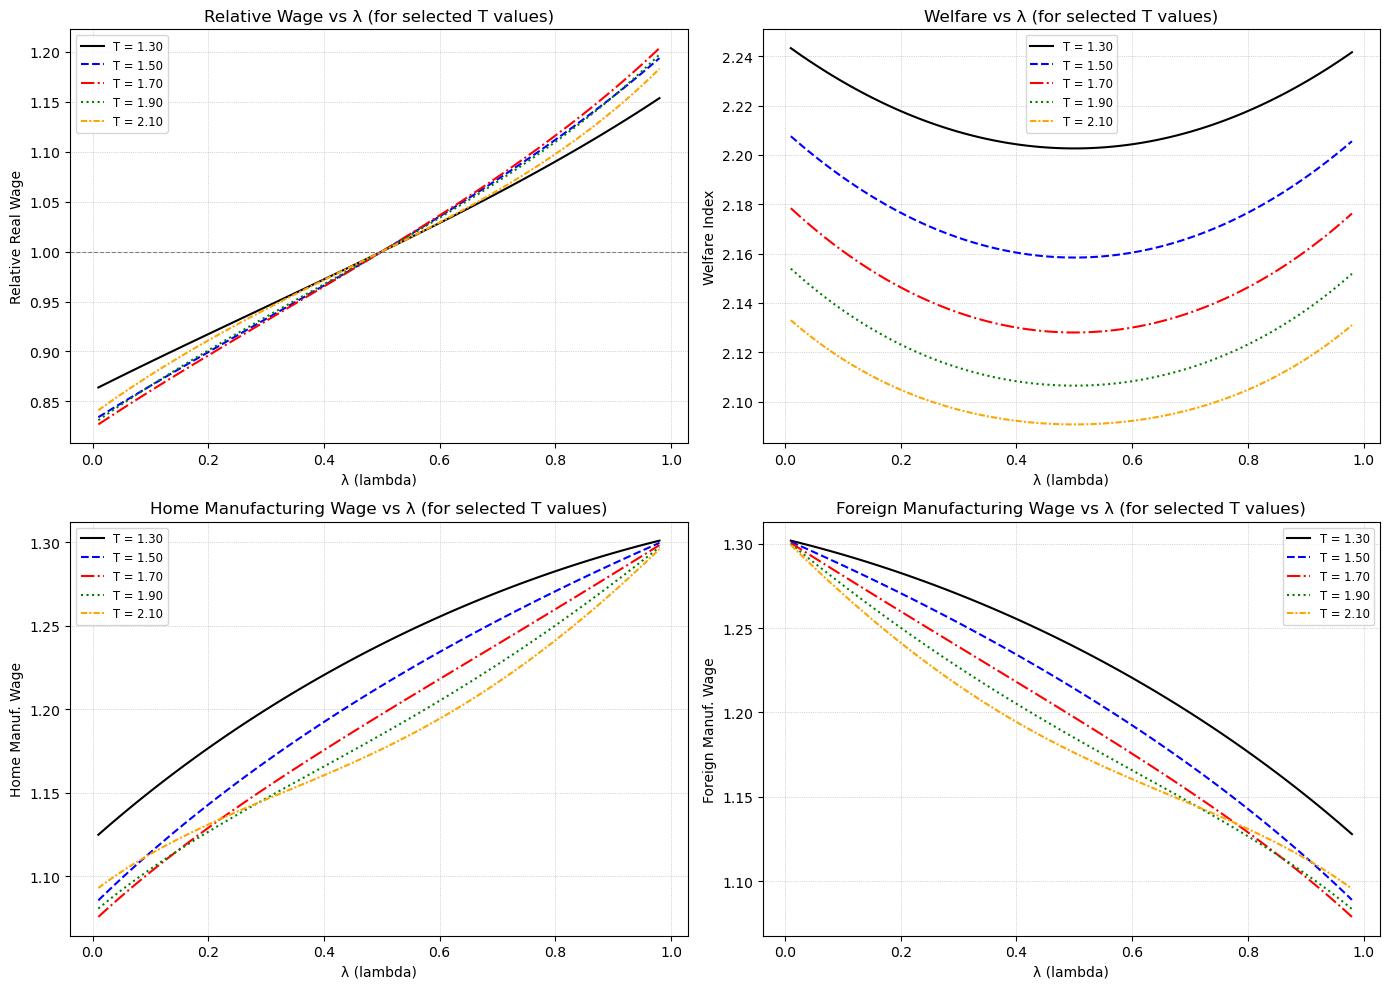

In [5]:
#  benchmark values as described in Table 4.1
phi1=0.5
#phi2=0.5
gam=0.4
L=2
rho=0.7 # Group 7
eps=1/(1-rho)
bet=0.8
alp=0.08 
delta=0.45 # Group 7
T = 1.9

lines = ["-","--","-.",":","+","."]
color = ["Black","Green","Red","Yellow","Purple","Grey"]

# Define number of iterations T and lambda
Th_min=130
Th_max=401 
Th_step=1
Th_div=100

lamh_min=1
lamh_max=99
lamh_step=1
lamh_div=100

Th_values = np.arange(Th_min, Th_max, Th_step) / Th_div
lam_values = np.arange(lamh_min, lamh_max, lamh_step) / lamh_div

type_varying = 1 # in order to use the different Th values
Relative_matrix, Welfare_matrix, W_Man_H_matrix, W_Man_F_matrix, W_Farm_H_matrix, W_Farm_F_matrix = run_varying_specific_parameter(Th_values,lam_values,alp,bet,gam,delta,eps,rho,phi1,L,T,type_varying)

selected_T_values = [T]
selected_T_indices = [np.argmin(np.abs(Th_values - T_sel)) for T_sel in selected_T_values]
plot_4_matrix_values(lam_values, Th_values, selected_T_indices, Relative_matrix, Welfare_matrix, W_Man_H_matrix, W_Man_F_matrix, 'T')


selected_T_values = [1.3, 1.5, 1.7, 1.9, 2.1]
selected_T_indices = [np.argmin(np.abs(Th_values - T_sel)) for T_sel in selected_T_values]
plot_4_matrix_values(lam_values, Th_values, selected_T_indices, Relative_matrix, Welfare_matrix, W_Man_H_matrix, W_Man_F_matrix, 'T')

<div style="text-align:center">
  <h4>Exercise 2 The role of farmers</h4>
</div>
Farmers play an important role in the core-periphery model although their role oftentimes
remains somewhat underexposed in the discussion of the model. In this exercise, you will study
in some more detail the role of farmers in the core-periphery model.

a. All results derived in the book by Brakman et al. are based on the assumption that
agricultural workers are evenly distributed over the two regions ($\phi_1=\phi_2=0.5$). Solve
the model under the alternative assumption that $\phi_1$ = 0.55 (and thus $\phi_2$ = 0.45).
Describe the resulting equilibrium/equilibria. Explain the effect of introducing asymmetry
in the allocation of farmers on the equilibrium outcome of the model in words. Provide
the economic intuition.

b. Characteristic for the development of modern economies over time is the shrinking of the
agricultural sector. Explain which parameter you need to vary to capture the shrinking of
the agricultural sector. Take the benchmark parametrization for your group and show the
effect of a shrinking share of farmers on the equilibrium outcome of the model (including
a description of the impact on welfare). Describe the effects in words and provide the
economic intuition. 

Part 2a


<Figure size 640x480 with 0 Axes>

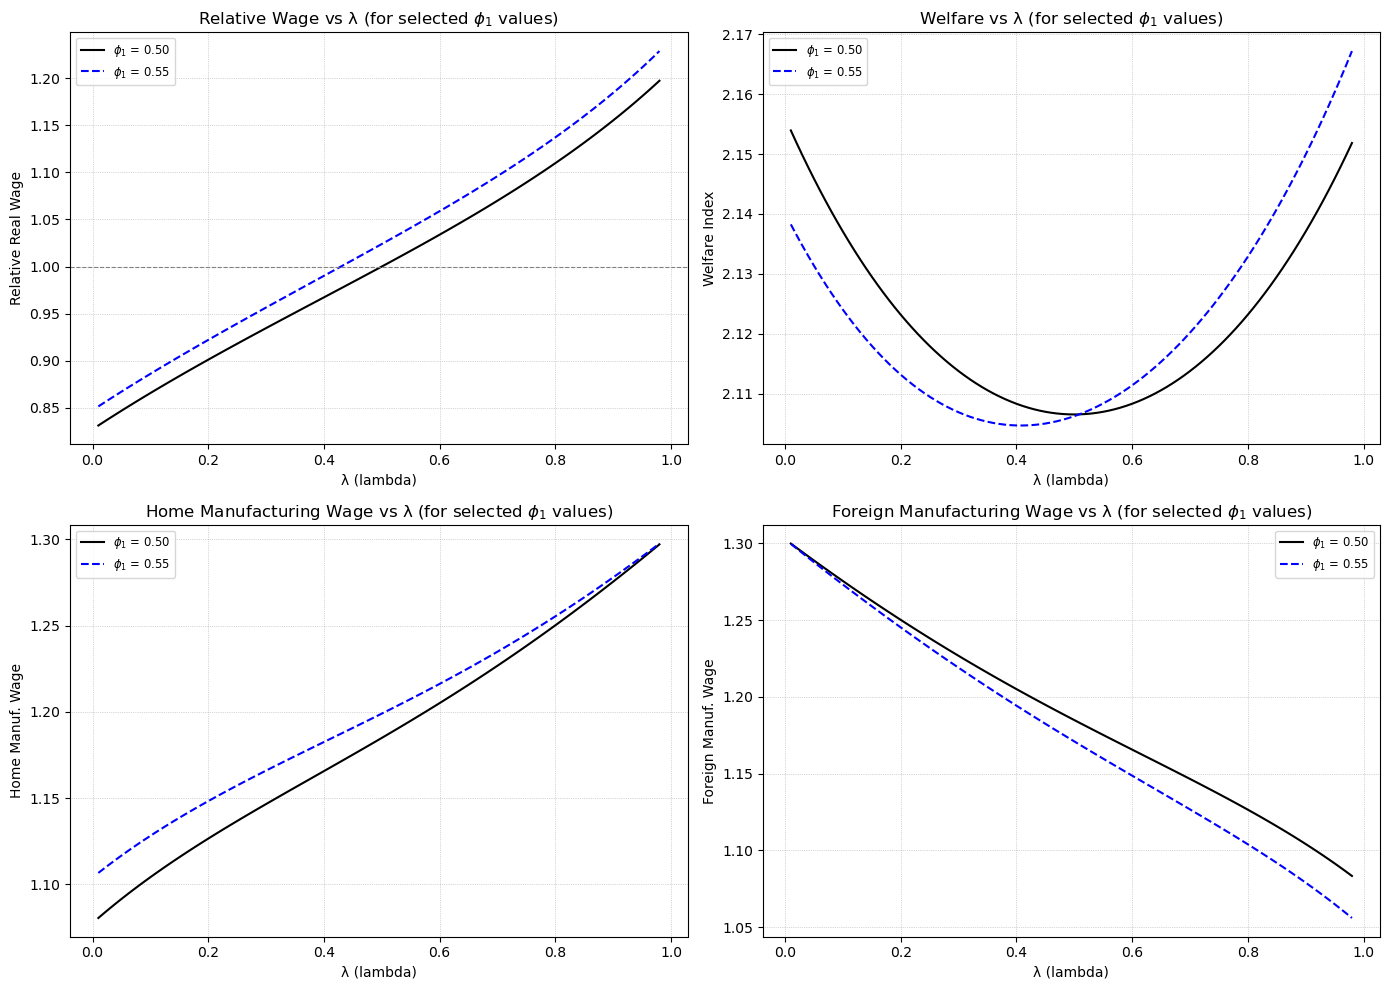

In [6]:
phi_min=30
phi_max=61 
phi_step=1
phi_div=100

phi_values = np.arange(phi_min, phi_max, phi_step) / phi_div

varying_values = phi_values
type_varying = 2 # in order to use the different phi values
Relative_matrix, Welfare_matrix, W_Man_H_matrix, W_Man_F_matrix, W_Farm_H_matrix, W_Farm_F_matrix = run_varying_specific_parameter(varying_values,lam_values,alp,bet,gam,delta,eps,rho,phi1,L,T,type_varying)
selected_phi_values = [0.5, 0.55]
selected_phi_indices = [np.argmin(np.abs(phi_values - phi_sel)) for phi_sel in selected_phi_values]
print("Part 2a")
plot_4_matrix_values(lam_values, phi_values, selected_phi_indices, Relative_matrix, Welfare_matrix, W_Man_H_matrix, W_Man_F_matrix, r'$\phi_1$')

To capture the shrinking of the agricultural sector, we should vary the parameter $\gamma$. This parameter represents the share of the labor force employed in the manufacturing sector. As  $\gamma$ increases, more labor is allocated to manufacturing, and less to agriculture. This captures the structural transformation of modern economies away from agriculture.

Part 2b


C:\Users\yanni\AppData\Local\Temp\ipykernel_31868\1189705755.py:6: RuntimeWarning: invalid value encountered in double_scalars
  W1-rho*bet**(-rho)*(delta/(alp*(eps-1)))**(1/eps)*(Y1*I1**(eps-1)+T**(1-eps)*Y2*I2**(eps-1))**(1/eps),
C:\Users\yanni\AppData\Local\Temp\ipykernel_31868\1189705755.py:7: RuntimeWarning: invalid value encountered in double_scalars
  W2-rho*bet**(-rho)*(delta/(alp*(eps-1)))**(1/eps)*(T**(1-eps)*Y1*I1**(eps-1)+Y2*I2**(eps-1))**(1/eps),
C:\Users\yanni\AppData\Local\Temp\ipykernel_31868\1189705755.py:8: RuntimeWarning: invalid value encountered in double_scalars
  I1-(gam*L/(alp*eps))**(1/(1-eps))*(bet/rho)*(lam*W1**(1-eps)+(1-lam)*T**(1-eps)*W2**(1-eps))**(1/(1-eps)),
C:\Users\yanni\AppData\Local\Temp\ipykernel_31868\1189705755.py:9: RuntimeWarning: invalid value encountered in double_scalars
  I2-(gam*L/(alp*eps))**(1/(1-eps))*(bet/rho)*(lam*T**(1-eps)*W1**(1-eps)+(1-lam)*W2**(1-eps))**(1/(1-eps)))


<Figure size 640x480 with 0 Axes>

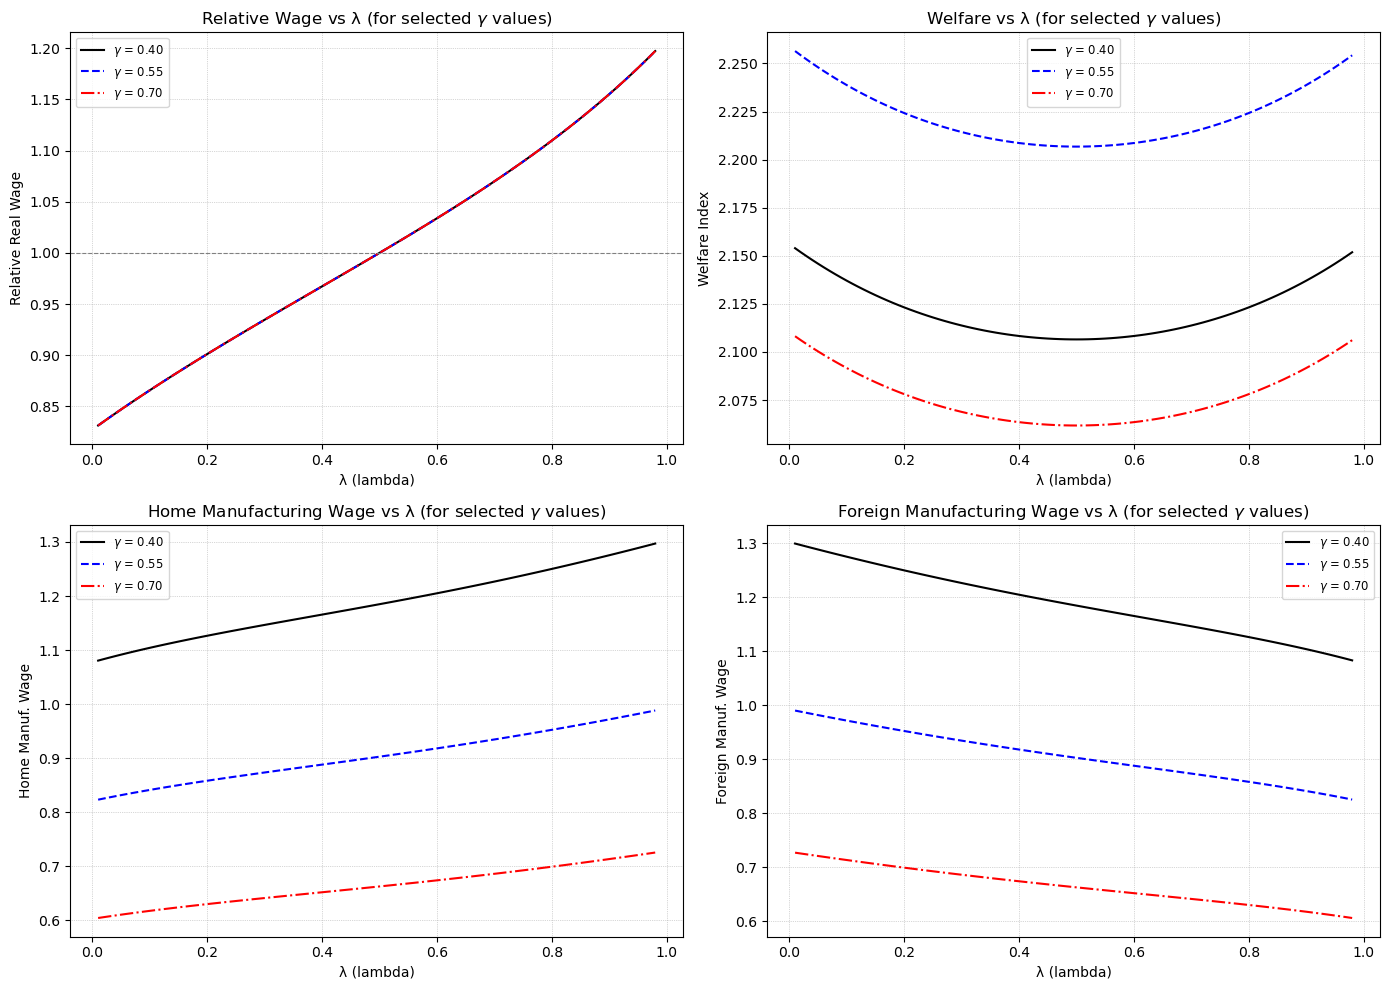

In [7]:
print("Part 2b")
gamma_min=40
gamma_max=71 
gamma_step=1
gamma_div=100

gamma_values = np.arange(gamma_min, gamma_max, gamma_step) / gamma_div
varying_values = gamma_values
type_varying = 4 # in order to use the different gamma values
Relative_matrix, Welfare_matrix, W_Man_H_matrix, W_Man_F_matrix, W_Farm_H_matrix, W_Farm_F_matrix = run_varying_specific_parameter(varying_values,lam_values,alp,bet,gam,delta,eps,rho,phi1,L,T,type_varying)

selected_gamma_values = [0.4,0.55,0.7]
selected_gamma_indices = [np.argmin(np.abs(gamma_values - gamma_sel)) for gamma_sel in selected_gamma_values]
plot_4_matrix_values(lam_values, gamma_values, selected_gamma_indices, Relative_matrix, Welfare_matrix, W_Man_H_matrix, W_Man_F_matrix, r'$\gamma$')

<div style="text-align:center">
  <h4>Exercise 3 The role of substitutability and market power</h4>
</div>
In our modern society, there is increasing discussion about the role of market power which is
associated with the ease of substitutability between manufacturing goods. Use the model to
discuss the implications of an increase in market power. Clearly motivate which parameter you
have changed and discuss the consequences for the spatial distribution of economic activity. 

To analyze the impact of increasing market power in the model, we vary the parameter $\epsilon$, which represents the elasticity of substitution between manufacturing goods. A lower $\epsilon$ implies that goods are less substitutable, giving firms greater pricing power and thus increasing market power.

By reducing $\epsilon$, we can examine how stronger market power affects the spatial distribution of economic activity and overall welfare. In this analysis, we decrease $\epsilon$ from its benchmark value of 5.0 to lower levels such as 4.0, 3.0 and 2.0, reflecting scenarios of gradually increasing market power.

C:\Users\yanni\AppData\Local\Temp\ipykernel_31868\1189705755.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  W1-rho*bet**(-rho)*(delta/(alp*(eps-1)))**(1/eps)*(Y1*I1**(eps-1)+T**(1-eps)*Y2*I2**(eps-1))**(1/eps),
C:\Users\yanni\AppData\Local\Temp\ipykernel_31868\1189705755.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  W2-rho*bet**(-rho)*(delta/(alp*(eps-1)))**(1/eps)*(T**(1-eps)*Y1*I1**(eps-1)+Y2*I2**(eps-1))**(1/eps),
C:\Users\yanni\AppData\Local\Temp\ipykernel_31868\1189705755.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  I1-(gam*L/(alp*eps))**(1/(1-eps))*(bet/rho)*(lam*W1**(1-eps)+(1-lam)*T**(1-eps)*W2**(1-eps))**(1/(1-eps)),
C:\Users\yanni\AppData\Local\Temp\ipykernel_31868\1189705755.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  I2-(gam*L/(alp*eps))**(1/(1-eps))*(bet/rho)*(lam*T**(1-eps)*W1**(1-eps)+(1-lam)*W2**(1-eps))**(1/(1-eps)))
C:\Users\yanni\AppData\Local\Temp\ipykernel_31868\1189705755

<Figure size 640x480 with 0 Axes>

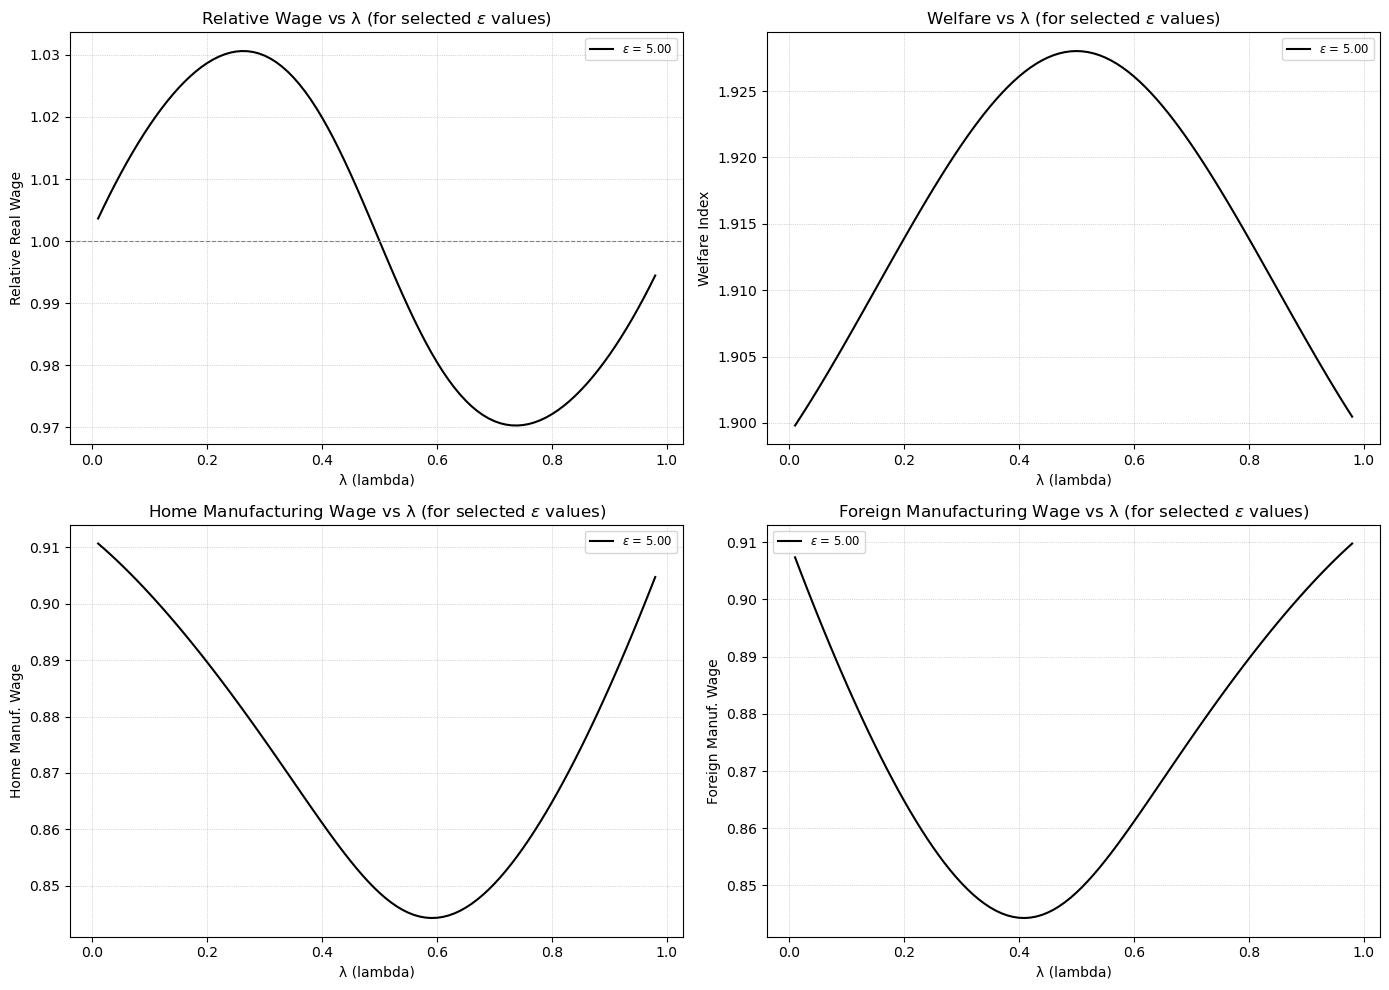

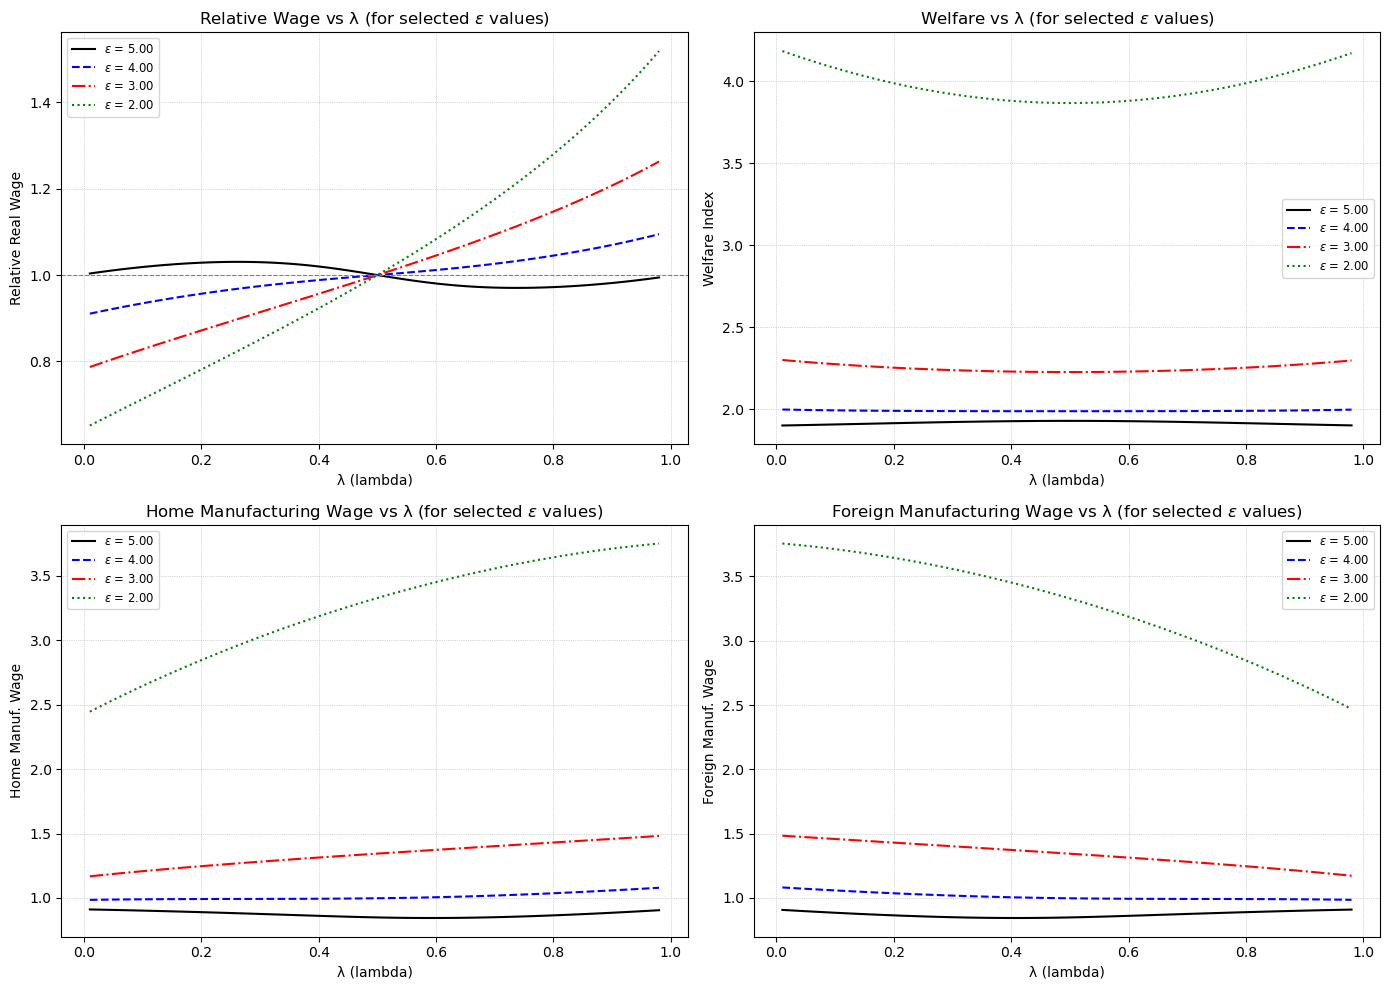

In [9]:
eps_min=100
eps_max=501
eps_step=1
eps_div=100

eps_values = np.arange(eps_min, eps_max, eps_step) / eps_div

varying_values = eps_values
type_varying = 3 # in order to use the different eps values
Relative_matrix, Welfare_matrix, W_Man_H_matrix, W_Man_F_matrix, W_Farm_H_matrix, W_Farm_F_matrix = run_varying_specific_parameter(varying_values,lam_values,alp,bet,gam,delta,eps,rho,phi1,L,T,type_varying)

selected_eps_values = [5]
selected_eps_indices = [np.argmin(np.abs(eps_values - eps_sel)) for eps_sel in selected_eps_values]
plot_4_matrix_values(lam_values, eps_values, selected_eps_indices, Relative_matrix, Welfare_matrix, W_Man_H_matrix, W_Man_F_matrix, r'$\epsilon$')

selected_eps_values = [ 5.0, 4.0, 3.0, 2.0]  
selected_eps_indices = [np.argmin(np.abs(eps_values - eps_sel)) for eps_sel in selected_eps_values]
plot_4_matrix_values(lam_values, eps_values, selected_eps_indices, Relative_matrix, Welfare_matrix, W_Man_H_matrix, W_Man_F_matrix, r'$\epsilon$')

<div style="text-align:center">
  <h4>Exercise 4. Determination of the break and sustain points</h4>
</div>
a. Characteristic for the core-periphery model is that multiple stable equilibria can arise. As is explained in the book, there is only a limited range of values for transport costs for which such multiple equilibria exist. This range is characterized by the so-called break and sustain points. You are asked to determine the break and sustain points for your parametrization of the model as precisely as possible (as above). Illustrate your answer graphically by depicting the equilibrium shares of mobile workers in region 1 (on the vertical axis) as a function of the transport cost (on the horizontal axis): this yields the socalled Tomahawk diagram (compare Figure 7.9 (3rd edition) or Figure 4.3 (2nd edition) in the book). Clearly mark all the stable and unstable equilibria. 

b. Also sketch the above relationship for the case in which farmers are not equally distributed over the regions, but instead there are relatively many farmers in region 1 (see question 2a).

In [10]:
def check_stability(Relative_matrix, Th_values, lamh_min, lamh_max, lamh_div, prec):
    T_lambda = []
    T_T = []
    T_Stab=[]
    lam_values = np.arange(lamh_min, lamh_max, lamh_step) / lamh_div

    for k in range(len(Th_values)):
        # Main loop to check points near Rel=1
        T = Th_values[k]
        Relative = Relative_matrix[k, :]
        
        for x in range(len(lam_values)):
            y = x-1
            if Relative[x] >= 1-prec and Relative[x] <= 1+prec and Relative[x]>Relative[y]:
                axis = x/lamh_div +lamh_min/lamh_div
                #print (axis)
                T_lambda.append(axis)
                T_T.append(T)
                T_Stab.append(0) # stability still to be defined by checking whether Relative(x-1)<Relative(x) if so then unstable; same can be done for Relative (x+1)
            elif Relative[x] >= 1-prec and Relative[x] <= 1+prec and Relative[x]<=Relative[y]:
                axis = x/lamh_div +lamh_min/lamh_div
                #print (axis)
                T_lambda.append(axis)
                T_T.append(T)
                T_Stab.append(1) # stability still to be defined by checking whether Relative(x-1)<Relative(x) if so then unstable; same can be done for Relative (x+1)
                
            if Relative[lamh_min] < 1:
                axis = 0.0
                #print (axis)
                T_lambda.append(axis)
                T_T.append(T)
                T_Stab.append(1)
            else:
                T_lambda.append(0)
                T_T.append(T)
                T_Stab.append(0)
            if Relative[lamh_max-lamh_min-1] > 1:
                axis = 1.0
                #print (axis)
                T_lambda.append(axis)
                T_T.append(T)
                T_Stab.append(1)
            else:
                T_lambda.append(1)
                T_T.append(T)
                T_Stab.append(0)

    return T_lambda, T_T, T_Stab

def plot_tomahawk(T_lambda, T_T, T_Stab, colstab, title):

    fig, ax = plt.subplots(figsize=(8,6))

    colors = [colstab[stab] for stab in T_Stab]
    sizes = [30 if stab == 1 else 10 for stab in T_Stab]  # Bigger for stable
    ax.scatter(T_T, T_lambda, c=colors, s=sizes, edgecolor='k', alpha=0.8)

    ax.set_xlabel('T', fontsize=12)
    ax.set_ylabel('Lambda', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')

    # Grid and style
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_facecolor('#f9f9f9')

    ax.spines['bottom'].set_linewidth(1.2)
    ax.spines['left'].set_linewidth(1.2)

    plt.tight_layout()
    plt.show()


This displays the results with our parametrization of the model (so \phi_1=0.50)


<Figure size 640x480 with 0 Axes>

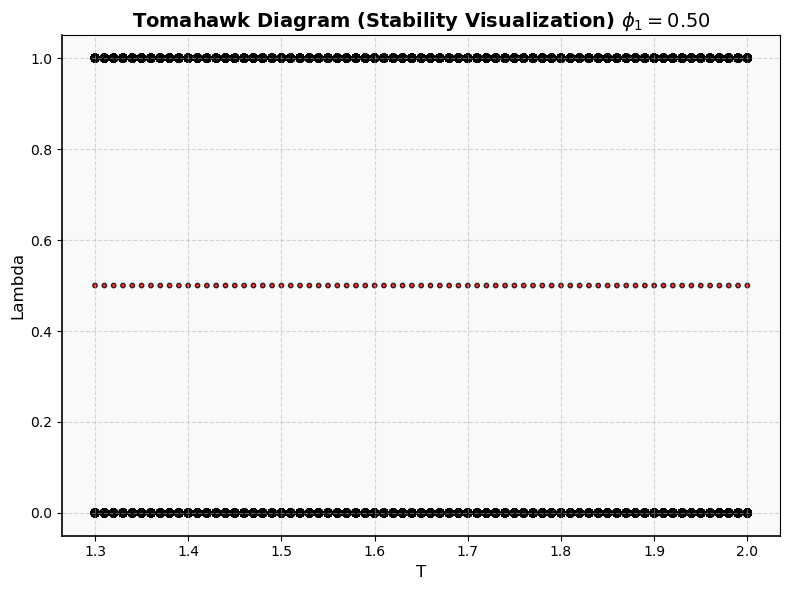

In [11]:
Th_min=130
Th_max=201 
Th_step=1
Th_div=100

lamh_min=1
lamh_max=99
lamh_step=1
lamh_div=100

prec = 0.0005

Th_values = np.arange(Th_min, Th_max, Th_step) / Th_div
lam_values = np.arange(lamh_min, lamh_max, lamh_step) / lamh_div

type_varying = 1 # in order to use the different Th values
Relative_matrix, Welfare_matrix, W_Man_H_matrix, W_Man_F_matrix, W_Farm_H_matrix, W_Farm_F_matrix = run_varying_specific_parameter(Th_values,lam_values,alp,bet,gam,delta,eps,rho,phi1,L,T,type_varying)
T_lambda, T_T, T_Stab = check_stability(Relative_matrix, Th_values, lamh_min, lamh_max, lamh_div, prec)

colstab = {0: 'red', 1: 'black'}  # unstable = red, stable = black
print('This displays the results with our parametrization of the model (so \phi_1=%.2f)'%phi1)
plot_tomahawk(T_lambda, T_T, T_Stab, colstab, title=r'Tomahawk Diagram (Stability Visualization) $\phi_1=%.2f$'%phi1)

This displays the results with relatively many farmers in region 1 (so \phi_1=0.55)


<Figure size 640x480 with 0 Axes>

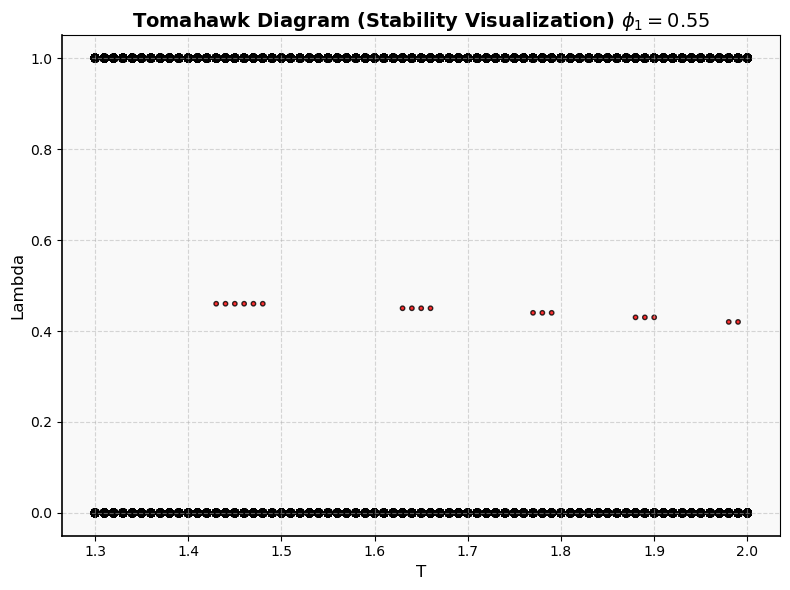

In [12]:
#this case displays unequally distributed farmers
phi_temp = 0.55

type_varying = 1 # in order to use the different Th values
Relative_matrix, Welfare_matrix, W_Man_H_matrix, W_Man_F_matrix, W_Farm_H_matrix, W_Farm_F_matrix = run_varying_specific_parameter(Th_values,lam_values,alp,bet,gam,delta,eps,rho,phi_temp,L,T,type_varying)
T_lambda, T_T, T_Stab = check_stability(Relative_matrix, Th_values, lamh_min, lamh_max, lamh_div, prec)

colstab = {0: 'red', 1: 'black'}  # unstable = red, stable = black
print('This displays the results with relatively many farmers in region 1 (so \phi_1=%.2f)'%phi_temp)
plot_tomahawk(T_lambda, T_T, T_Stab, colstab, title=r'Tomahawk Diagram (Stability Visualization) $\phi_1=%.2f$'%phi_temp)

<div style="text-align:center">
  <h4>Exercise 5. Distribution and regional policy in times of increasing populism.
</h4>
</div>
As is discussed in chapter 3 of the book, four different groups of actors can be distinguished in the model (viz. farmers and manufacturing workers at home and in the foreign country). Take
your answer in question 2a as a starting point. Consider what happens to the welfare of members of the four groups when you move from a static equilibrium with 	 = 0.02 up to a static
equilibrium with 	 = 0.98. Will each and every group always gain from moving from a shortrun unstable equilibrium towards a long-run stable equilibrium? Explain your answer. Characterize the preferred equilibria for the four  groups. Also describe what the results imply for the desirability of regional-economic policies. More specifically, describe reasons why regional policies might be desirable (and for whom). Furthermore, describe concrete  possible policy measures that could be used. Pay explicit attention to the way in which temporary policies can have long-lasting effects in this type of model. But also pay attention to potential
limitations in effectiveness of policies. In doing so, reflect on what the insights of this exercise imply for recent discussions on the sources and implications of wide regional disparities in, for example, the UK, Germany, France, the Netherlands, the USA, etc. etc

<div style="text-align:center">
  <h4>Exercise 6. Model calibration.
</h4>
</div>
Although the model is highly stylised, we may try to calibrate the model, meaning that we look for parameter values that are ‘realistic’. Considering the key-parameters described in Table 4.1,
what are in your view realistic parameter values? As an example of an attempt to calibrate the transport cost, consider Box 3.3 in the book. 

In providing an answer, you are free to specify a particular country and/or sector. You need not provide concrete numbers for all parameters, but you should at least clearly describe what the parameter captures and how you could go about in using empirical evidence to put some numbers to the parameters. Providing some concrete well-chosen numerical values is required. You may also point at some oversimplifications in the model that prevent you from properly putting numbers to some of the parameters. Using your choice of parameter values, how likely is it that you will get more than one equilibrium? Reflect on the more general implications of this for the real-life relevance of the possibility in the model that there are five equilibria (of
which three are stable).